In [96]:
import pandas as pd
from matplotlib import dates as mpl_dates 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import math
from datetime import datetime, timedelta 
from jinja2 import Environment, FileSystemLoader

read = pd.read_csv('700000s.txt', delimiter=',', encoding='utf8', header=None, names=["day", "time", "user", "message"])
#droping the first column because all id values are from the individual day csv files
df = read.reset_index(drop=True)
df

,day,time,user,message
0,2022-04-15,07:17:41,aceang_27,OMG SO EXITEDDD
1,2022-04-15,07:17:41,jorgrim,PauseChamp almost here
2,2022-04-15,07:17:42,vincentt23,pagPause
3,2022-04-15,07:17:43,cedricdabeast10,yyjF
4,2022-04-15,07:17:43,thedarkhealer,PauseChamp
...,...,...,...,...
1360182,2022-04-21,23:59:58,skyraelm,yyjWiggle yyjWiggle yyjWiggle
1360183,2022-04-21,23:59:58,above87,Sniper central
1360184,2022-04-21,23:59:58,northstarx08,snipers
1360185,2022-04-21,23:59:59,slyf0x__,KEKW


In [97]:
df.describe()

,day,time,user,message
count,1360187,1360186,1360187,1356966
unique,7,86361,23898,605720
top,2022-04-21,01:50:43,allexxx1996,KEKW
freq,249894,134,30166,22177


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360187 entries, 0 to 1360186
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   day      1360187 non-null  object
 1   time     1360186 non-null  object
 2   user     1360187 non-null  object
 3   message  1356966 non-null  object
dtypes: object(4)
memory usage: 41.5+ MB


In [99]:
today = datetime.today()
d2 = today.strftime("%B %d, %Y")
timestr = today.strftime("%Y-%m-%d")

In [100]:
emptyvalues = df[pd.isnull(df).any(axis=1)]
subscribed_at_Tier_1 = emptyvalues[emptyvalues.user.str.contains("subscribed at Tier 1")]
Total_tier1 = subscribed_at_Tier_1['user'].count()
subscribed_at_Tier_2 = emptyvalues[emptyvalues.user.str.contains("subscribed at Tier 2")]
Total_tier2 = subscribed_at_Tier_2['user'].count()
subscribed_at_Tier_3 = emptyvalues[emptyvalues.user.str.contains("subscribed at Tier 3")]
Total_tier3 = subscribed_at_Tier_3['user'].count()
subscribed_with_prime = emptyvalues[emptyvalues.user.str.contains("subscribed with Prime")]
Total_prime = subscribed_with_prime['user'].count()
gifted_subs = emptyvalues[emptyvalues.user.str.contains("gifted")]
Total_gifted = gifted_subs['user'].count()
timed_out_for = emptyvalues[emptyvalues.user.str.contains("timed out for")]
Total_time_out = timed_out_for['user'].count()
banned_from_this_channel  = emptyvalues[emptyvalues.user.str.contains("been permanently banned")]
Total_bans = banned_from_this_channel['user'].count()
d = {'Description': ["Subscribed at Tier 1", "Subscribed at Tier 2", "Subscribed at Tier 3", "Subscribed with Prime", "Gifted", "Timed Outs", "banned"], 'Total': [Total_tier1, Total_tier2, Total_tier3, Total_prime, Total_gifted, Total_time_out, Total_bans]}
moreData = pd.DataFrame(data=d)
moreData

,Description,Total
0,Subscribed at Tier 1,368
1,Subscribed at Tier 2,10
2,Subscribed at Tier 3,9
3,Subscribed with Prime,280
4,Gifted,2028
5,Timed Outs,421
6,banned,44


In [101]:
clean_wothoutNA = df.dropna()
most_used_words = pd.Series(' '.join(clean_wothoutNA['message']).split()).value_counts()[:70].reset_index()
clean1 = most_used_words.replace('󠀀', np.nan, regex=True)
text_withoutNan = clean1.dropna(axis='rows').replace({'\'':''}, {')':''}, regex=True)
text_withoutNan

#define values
values = ["The", "the", 'it', 'be', 'is', 'you', 'a', 'to', 'no', 'in', 'that', 'she', 'this', 'for', 
          'not', 'good', 'I', 'on', 'and', 'i', '1', '2', 'Lmao', 'Lol', "You", 'like', 'just', 'its', '?', 'lol', 'all', 'so', 'will',
          'of', 'are', 'they', 'bye', '⠀', 'yes', 'he', 'can', '11', 'go', 'him', 'your', 'back', 'her', 'D', 'u', 'do', 'take', 'need', 
          'more', 'why', 'have', 'what', 'with', 'dont', 'get', 'eat', 'drink', "jinny", "was", "my", "we"
          ,"nice", "too", "me", "one", "yuggie", "at", "how", "it\'s", "ye", "yea", "!bet", "hair", "milk", "🥕", "wind",
          "S", "yeah", "ok", "mode", "water", "there", "drone"]

#drop rows that contain any value in the list
textwithoutmostusedwords = text_withoutNan[text_withoutNan['index'].isin(values) == False]

#another way to search for most used words 
#df.message.value_counts().reset_index()

#--------------------------------------------------Saving in a document----------------------------------------------------------------
savetextwithoutmostusedwords = textwithoutmostusedwords.to_csv("topemotes.txt", sep=' ', header=False, index=False)
#--------------------------------------------------------------------------------------------------------------------------------------

Cleanreadytop20chatters = pd.read_csv("topemotes.txt", delimiter=' ', encoding='utf8', header=None, names=["Emote", "Times Used"])
Cleanreadytop20chatters

,Emote,Times Used
0,LUL,39548
1,KEKW,35828
2,YEP,32949
3,PepeLaugh,24582
4,monkaW,21524
5,yyjWiggle,18917
6,KEKL,17761
7,yyjPog,17040
8,PogU,16243
9,yyjPopcorn,15606


In [102]:
top20Chatters = df.user.value_counts()[:20].reset_index()

In [103]:
nametop_1 = [None] * 20
Searching_by_User_top_1 = [None] * 20
Searching_by_UserTop_1_emote = [None] * 20
textwithoutmostusedwords_byuser1 = [None] * 20
topemotefromtop1chatter = [None] * 20
howManyTimesWasUsedThe_topemotefrom_top1chatter = [None] * 20
topemotefromtop_1chatter_second_emote = [None] * 20
howManyTimesWasUsedThe_topemotefrom_top_1chatter_second_emote = [None] * 20

for m in range(20):
    nametop_1[m] = top20Chatters.loc[m, 'index']
    Searching_by_User_top_1[m] = df[(df["user"] == nametop_1[m]) & (df["message"] )]
    Searching_by_UserTop_1_emote[m] = pd.Series(' '.join(Searching_by_User_top_1[m]['message']).split()).value_counts()[:15].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
    textwithoutmostusedwords_byuser1[m] = Searching_by_UserTop_1_emote[m][Searching_by_UserTop_1_emote[m]['index'].isin(values) == False].reset_index()
    topemotefromtop1chatter[m] = textwithoutmostusedwords_byuser1[m].loc[0, 'index']
    howManyTimesWasUsedThe_topemotefrom_top1chatter[m] = textwithoutmostusedwords_byuser1[m].loc[0,0]
    topemotefromtop_1chatter_second_emote[m] = textwithoutmostusedwords_byuser1[m].loc[1, 'index']
    howManyTimesWasUsedThe_topemotefrom_top_1chatter_second_emote[m] = textwithoutmostusedwords_byuser1[m].loc[1,0]


In [104]:
tota_unique_chatters = len(df.user.value_counts())
tota_unique_chatters

23898

In [105]:
first_message = datetime.strptime(df.time.iloc[1], '%H:%M:%S')
last_message = datetime.strptime(df.time.iloc[-1], '%H:%M:%S')
Total_Hours_streamed = last_message - first_message
print(Total_Hours_streamed)

16:42:18


In [106]:
print("top chatters of", d2)
#total messages
topChatters = df.user.value_counts().reset_index()
totalChatters = int(topChatters['user'].sum())
print("Messages logged =", totalChatters)
plot_index_Totalmsg = str('Total Messages ') +  str(totalChatters)
#total 20 chatters
top20Chatters = df.user.value_counts()[:20].reset_index()
totalTop20Chatters = int(top20Chatters['user'].sum())
print("Sum of total 20 messages =",totalTop20Chatters)
percentageTop20Chatter = round(((totalTop20Chatters / totalChatters) * 100) , 2)
print("Perentage of Top 20 chatters =", percentageTop20Chatter)
plot_index_top20 = str('Percentage of Top 20 ') +  str(percentageTop20Chatter)
#total 5 chatters
top5Chatters = df.user.value_counts()[:5].reset_index()
totalTop5Chatters = int(top5Chatters['user'].sum())
print("Sum of total 5 messages =",totalTop5Chatters)
percentageTop5Chatter = round(((totalTop5Chatters / totalChatters) * 100) , 2)
print("Perentage of Top 5 chatters =", percentageTop5Chatter)
plot_index_top5 = str('Percentage of Top 5 ') +  str(percentageTop5Chatter) 

top20Chatters['Most used emote by user'] = pd.Series(topemotefromtop1chatter)

top20Chatters['Times used'] = pd.Series(howManyTimesWasUsedThe_topemotefrom_top1chatter)

top20Chatters['Second most used emote by user'] = pd.Series(topemotefromtop_1chatter_second_emote)

top20Chatters['Total for second emote'] = pd.Series(howManyTimesWasUsedThe_topemotefrom_top_1chatter_second_emote)

top20Chatters.to_csv('top20Chatters.csv', header=False, index=False,)

notopChatter = totalChatters - totalTop20Chatters

top20withouttop5 = totalTop20Chatters - totalTop5Chatters

print("other messeges", notopChatter)
print("top 20 with out Top 5", top20withouttop5)
print("tatal messeges from top 5 ",totalTop5Chatters)
print("total messges",notopChatter + top20withouttop5 + totalTop5Chatters)



top chatters of April 22, 2022
Messages logged = 1360187
Sum of total 20 messages = 241553
Perentage of Top 20 chatters = 17.76
Sum of total 5 messages = 103047
Perentage of Top 5 chatters = 7.58
other messeges 1118634
top 20 with out Top 5 138506
tatal messeges from top 5  103047
total messges 1360187


In [107]:
prueba = clean_wothoutNA.day.value_counts().reset_index()
saving_prueba = prueba.to_csv("prueba.txt", sep=' ', header=False, index=False)
read_saving_prueba = pd.read_csv("prueba.txt", delimiter=' ', encoding='utf8', header=None, names=["Day", "Messages"])

In [108]:
months = read_saving_prueba["Day"].to_numpy()
drop_index_from_Searching_by_User = [len(df[(df["day"] == day)].user.value_counts()) for day in months] 


In [109]:
read_saving_prueba = read_saving_prueba
read_saving_prueba["Chatters"] = pd.Series(drop_index_from_Searching_by_User)
newplot = read_saving_prueba.sort_values(by='Day')

In [110]:
import calendar
calendar.setfirstweekday(6)

def get_week_of_month(year, month, day):
    x = np.array(calendar.monthcalendar(year, month))
    week_of_month = np.where(x==day)[0][0] + 1
    return(week_of_month)

cell = [None] * int(len(newplot))
#y = [None] * 25
#m = [None] * 25
d = [None] * int(len(newplot))
for g in range(len(newplot)):
    cell[g] = newplot.loc[g, 'Day']
#    y[g] = cell[g][:4]
#    m[g] = cell[g][5:-3]
    d[g] = cell[g][8:]
#
#weeks = pd.DataFrame(y)  
#weeks['month'] = pd.Series(m)
newplot['day'] = pd.Series(d)



get_week_of_month(2022,3,31) 

5

In [111]:
Week_1 = 1
Week_2 = 3
Week_3 = 10
Week_4 = 17
Week_5 = 24
last_day = 30

def applyFunc(s):
    if s == Week_1 or s < Week_2:
        return "Week 1"
    elif s == Week_2 or s < Week_3:
        return 'Week 2'
    elif s == Week_3 or s < Week_4:
        return '700k week 1'
    elif s == Week_4 or s < Week_5:
        return '700k week 2'
    elif s == Week_5 or s <= last_day:
        return 'Week 5'
    return ''
newplot["Day"] = pd.to_datetime(newplot["Day"])
newplot['day_of_the_week'] = pd.Series(newplot['Day'].dt.day_name())
newplot['day_of_the_week'] = pd.Series(newplot['Day'].dt.day_name())
newplot['day'] = newplot['day'].astype(int)
newplot['Week'] = newplot['day'].apply(applyFunc)
newplot["Day"] = newplot["Day"].dt.date

newplot.reset_index(drop='index')

,Day,Messages,Chatters,day,day_of_the_week,Week
0,2022-04-15,166098,5950,15,Friday,700k week 1
1,2022-04-16,187176,6845,16,Saturday,700k week 1
2,2022-04-17,216390,7617,17,Sunday,700k week 2
3,2022-04-18,193560,7405,18,Monday,700k week 2
4,2022-04-19,188895,6923,19,Tuesday,700k week 2
5,2022-04-20,155536,6071,20,Wednesday,700k week 2
6,2022-04-21,249311,8716,21,Thursday,700k week 2


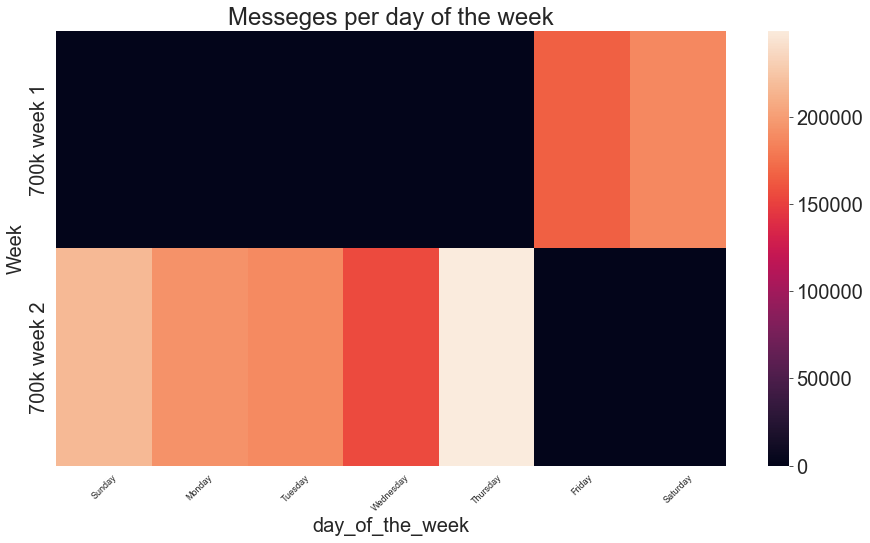

In [112]:
heatmap = newplot.pivot_table(index="Week", columns="day_of_the_week", values="Messages").fillna(0)
week_pivot = heatmap.reindex(columns=['Sunday','Monday','Tuesday', 'Wednesday','Thursday','Friday','Saturday'])
week_messeges_heatmap = plt.figure(figsize = (15,8))
week_messeges_heatmap = sns.heatmap(week_pivot, annot=False).set(title='Messeges per day of the week' )
week_messeges_heatmap = plt.xticks(fontsize=9, rotation=45)

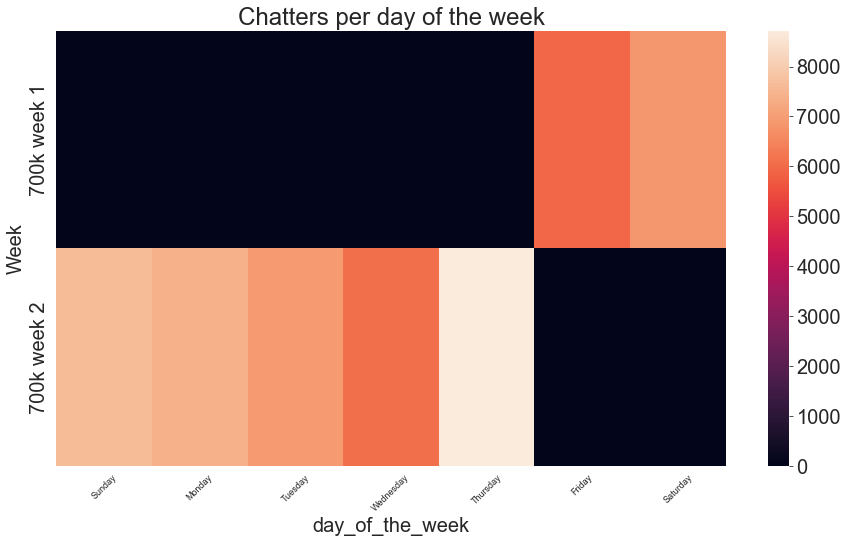

In [113]:
chatters_heatmap = newplot.pivot_table(index="Week", columns="day_of_the_week", values="Chatters").fillna(0)
chatters_heatmap = chatters_heatmap.reindex(columns=['Sunday','Monday','Tuesday', 'Wednesday','Thursday','Friday','Saturday'])
week_chatters_heatmap = plt.figure(figsize = (15,8))
week_chatters_heatmap = sns.heatmap(chatters_heatmap, annot=False).set(title='Chatters per day of the week' )
week_chatters_heatmap = plt.xticks(fontsize=9, rotation=45)

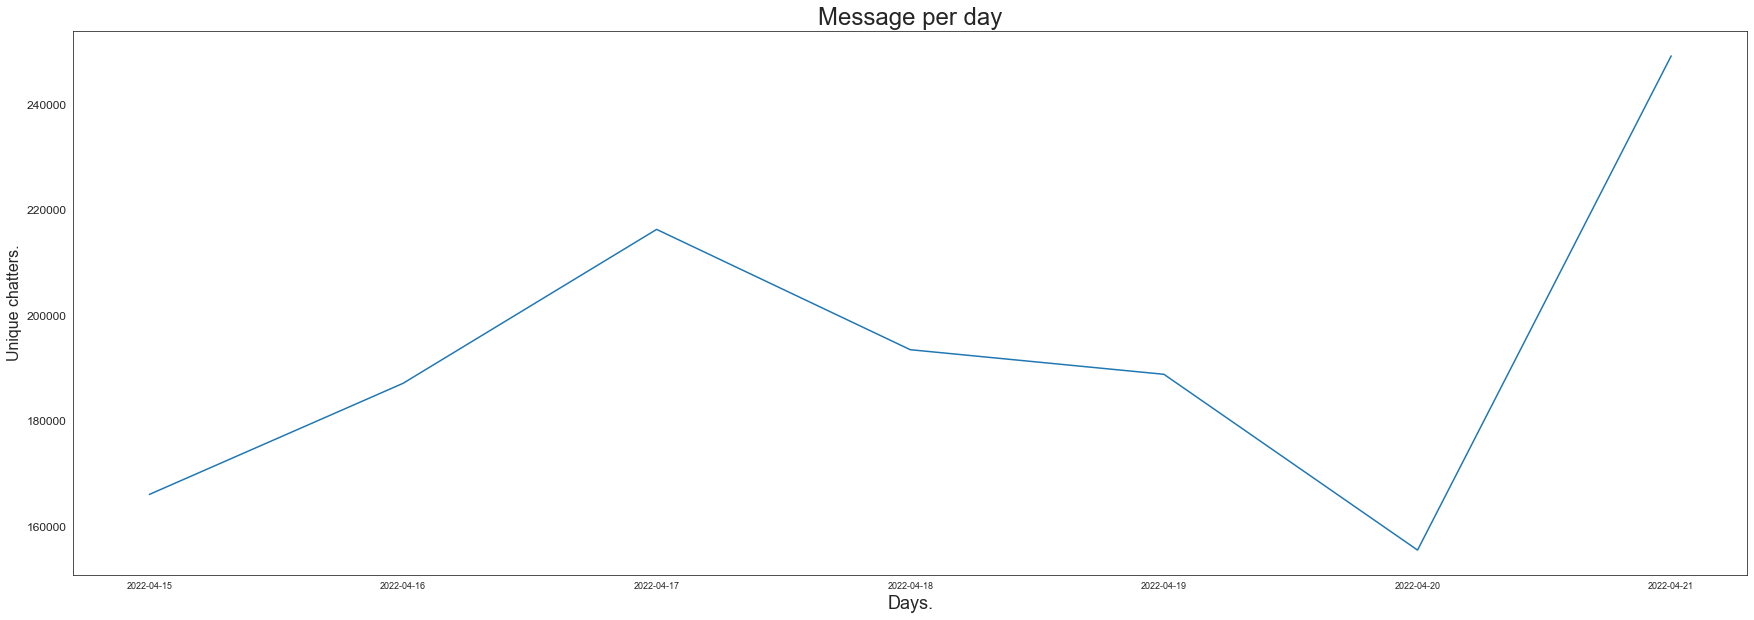

In [114]:
chart_messeges_per_day = plt.figure(figsize=(30,10))
chart_messeges_per_day = plt.plot(newplot.Day, newplot.Messages)
chart_messeges_per_day = plt.title("Message per day")
chart_messeges_per_day = plt.xlabel('Days.', fontsize=18)
chart_messeges_per_day = plt.ylabel('Unique chatters.', fontsize=16)
chart_messeges_per_day = plt.xticks(fontsize=9, rotation=360)
chart_chatters_per_day = plt.yticks(fontsize=12)
chart_messeges_per_day = plt.show()

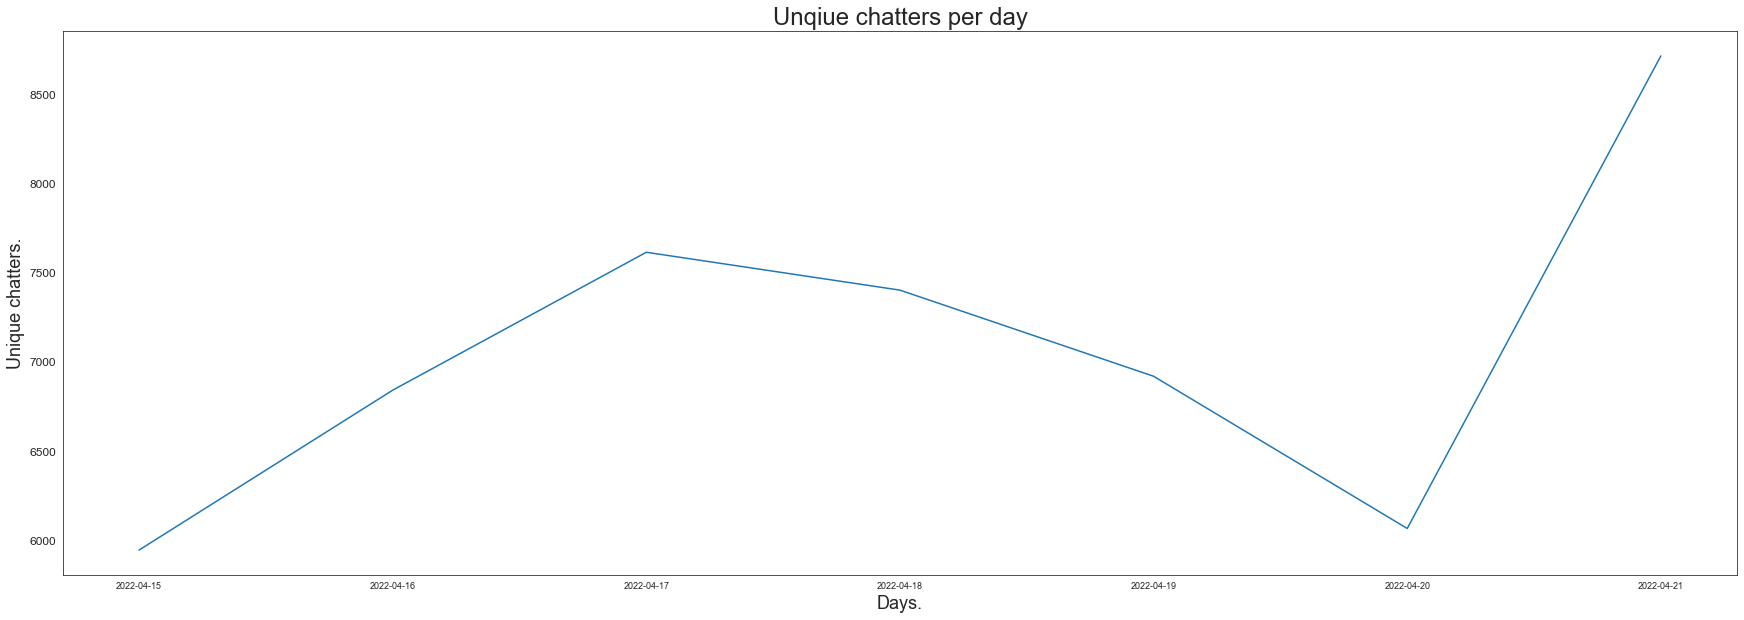

In [115]:
chart_chatters_per_day = plt.figure(figsize=(30,10))
chart_chatters_per_day = plt.plot(newplot.Day, newplot.Chatters)
chart_chatters_per_day = plt.title("Unqiue chatters per day")
chart_chatters_per_day = plt.xlabel('Days.', fontsize=18)
chart_chatters_per_day = plt.ylabel('Unique chatters.', fontsize=18)
chart_chatters_per_day = plt.xticks(fontsize=9, rotation=360)
chart_chatters_per_day = plt.yticks(fontsize=12)
chart_chatters_per_day = plt.show()

In [116]:
readytop20chatters = pd.read_csv('top20Chatters.csv', encoding='utf8', header=None, names=["User", "Total", "Most used emote", "Times used", "Second most used emote", "Times used 2"])
readytop20chatters['Top'] = pd.Series(["1", "2", "3", "4", "5", "6","7","8","9","10","11","12","13","14","15", "16", "17", "18", "19", "20"])
readytop20chatters = readytop20chatters[['Top', "User", "Total", "Most used emote", "Times used", "Second most used emote", "Times used 2"]]

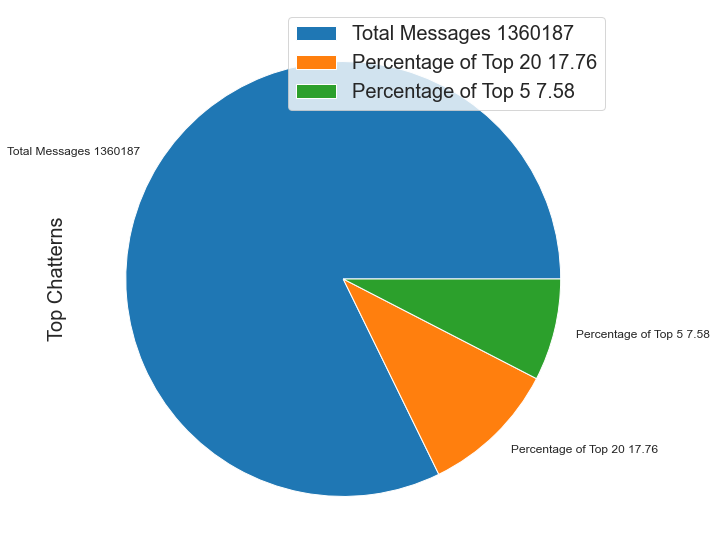

In [117]:
plt.rcParams['font.size'] = 20
top_chatters_frame = pd.DataFrame({'Top Chatterns' : [notopChatter, top20withouttop5, totalTop5Chatters]}, index=[plot_index_Totalmsg, plot_index_top20, plot_index_top5])
top_chatters_frame
plot = top_chatters_frame.plot.pie(y='Top Chatterns', figsize=(10, 10), fontsize=12)
plt.savefig('plot2')

In [118]:
# 2. Create a template Environment
env = Environment(loader=FileSystemLoader('templates'))

# 3. Load the template from the Environment
template = env.get_template('report_template.html')
# 4. Render the template with variables
html = template.render(page_title_text='My_report',
                       title_text='Jinnytty Stream report',
                       Day=d2,
                       top20Chatters_text='Top 20 Chatters',
                       totalChatters=totalChatters,
                       totalTop20Chatters=totalTop20Chatters,
                       percentageTop20Chatter=percentageTop20Chatter,
                       totalTop5Chatters=totalTop5Chatters,
                       percentageTop5Chatter=percentageTop5Chatter,
                       readytop20chatters=readytop20chatters,
                       MostUsedEmote_text='Most used Emote',
                       Cleanreadytop20chatters=Cleanreadytop20chatters,
                       totalChatters_text= totalChatters,
                       totalTop20Chatters_text=totalTop20Chatters,
                       percentageTop20Chatter_text=percentageTop20Chatter,
                       totalTop5Chatters_text=totalTop5Chatters,
                       percentageTop5Chatter_text=percentageTop5Chatter,
                       tota_unique_chatters=tota_unique_chatters,
                       topchatterspie_text='Top Chatters Pie',
)

# 5. Write the template to an HTML file
with open('html_report_jinja.html', 'w', encoding="utf-8") as f:
    f.write(html)